### Import necessary libraries

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Read data

In [62]:
df = pd.read_csv('../dataset_preparation/ranking_dataset.csv')
df

,unique_id,hurst,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,...,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1,exponential_smoothing,arima,xgboost,random_forest
0,artificialNoAnomaly/art_daily_no_noise.csv,NaN,4032,-45.198782,0.046765,5.000000e-01,1.000000e-04,2.500000e-01,1.050000e-62,1,...,8.854128,-5.440000e-14,2.970000e-26,-0.500000,0.250000,0.928571,2.240298e+01,2.528278e+01,1.135547e-02,3.701070e-03
1,artificialNoAnomaly/art_daily_perfect_square_w...,NaN,4032,-63.887428,0.043267,5.000000e-01,1.750000e-01,2.000000e-01,0.000000e+00,1,...,8.440207,0.000000e+00,0.000000e+00,-0.500000,0.250000,0.928571,2.238579e+01,2.666815e+01,9.474617e-03,2.440000e-05
2,artificialNoAnomaly/art_daily_small_noise.csv,0.412716,4032,-57.839587,0.046790,1.490000e-08,1.010000e-08,3.110000e-21,1.280000e-05,1,...,8.643415,-2.737291e-01,8.206679e-02,-0.620340,0.418001,0.918527,2.272072e+01,2.547392e+01,2.009846e+00,2.076357e+00
3,artificialNoAnomaly/art_flatline.csv,NaN,4032,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00
4,artificialNoAnomaly/art_noisy.csv,0.507001,4032,-4126.670693,0.299753,1.580000e-08,7.610000e-09,2.480000e-06,5.353556e-03,1,...,0.001607,-5.131762e-01,2.664287e-01,-0.676908,0.497557,0.005106,2.872416e+00,2.820160e+00,2.820342e+00,2.883200e+00
5,artificialWithAnomaly/art_daily_flatmiddle.csv,0.501646,4032,-49.327420,0.121571,5.372404e-01,1.590000e-07,2.630000e-07,1.456821e-02,1,...,8.769812,-1.216687e-01,1.705510e-02,-0.553618,0.314774,0.833093,3.344287e+01,3.906735e+01,1.302283e+01,1.304678e+01
6,artificialWithAnomaly/art_daily_jumpsdown.csv,0.523080,4032,-55.541723,0.098380,2.378961e-01,2.540000e-13,1.590000e-12,2.104731e-02,1,...,8.682667,-2.705612e-01,7.690519e-02,-0.611336,0.393784,0.861524,2.135077e+01,2.237935e+01,5.233680e+00,5.305939e+00
7,artificialWithAnomaly/art_daily_jumpsup.csv,0.565294,4032,-53.046075,0.260825,3.412410e-01,8.780000e-11,7.510000e-08,4.711886e-02,1,...,8.726534,-2.650736e-01,7.479507e-02,-0.619568,0.409203,0.817634,2.898232e+01,3.144872e+01,7.966740e+00,7.984297e+00
8,artificialWithAnomaly/art_daily_nojump.csv,0.553390,4032,-52.591420,0.185286,3.270213e-01,1.100000e-10,7.620000e-08,4.757963e-02,1,...,8.714155,-2.384850e-01,5.806725e-02,-0.599234,0.371903,0.796279,2.230242e+01,2.372645e+01,7.032782e+00,7.075534e+00
9,artificialWithAnomaly/art_increase_spike_densi...,0.324410,4032,-4751.528222,0.008390,1.500000e-08,1.040000e-08,5.360000e-09,4.910010e-04,1,...,0.224518,-4.910187e-01,5.635558e-01,-0.661972,0.877211,-0.020033,8.970895e-01,8.120496e-01,9.537371e-01,1.258561e+00


### Transform the data

Since 'artificialNoAnomaly/art_flatline.csv' have most of the columns as null, remove that from the dataset.

In [63]:
# Delete the row with index 3
df = df.drop(index=3)

In [64]:
# Find columns with null values
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

hurst        10
arch_acf     50
garch_acf    50
arch_r2      50
garch_r2     50
dtype: int64


Since the dataset size is around 50 and the above columns take most part of that, drop these columns.

In [65]:
# Find columns with null values and their count
null_columns = null_counts[null_counts > 0].index

# Drop columns with null values
df = df.drop(columns=null_columns)
df

,unique_id,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,seasonal_period,...,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1,exponential_smoothing,arima,xgboost,random_forest
0,artificialNoAnomaly/art_daily_no_noise.csv,4032,-45.198782,0.046765,5.000000e-01,1.000000e-04,2.500000e-01,1.050000e-62,1,288,...,8.854128,-5.440000e-14,2.970000e-26,-0.500000,0.250000,0.928571,2.240298e+01,2.528278e+01,1.135547e-02,3.701070e-03
1,artificialNoAnomaly/art_daily_perfect_square_w...,4032,-63.887428,0.043267,5.000000e-01,1.750000e-01,2.000000e-01,0.000000e+00,1,288,...,8.440207,0.000000e+00,0.000000e+00,-0.500000,0.250000,0.928571,2.238579e+01,2.666815e+01,9.474617e-03,2.440000e-05
2,artificialNoAnomaly/art_daily_small_noise.csv,4032,-57.839587,0.046790,1.490000e-08,1.010000e-08,3.110000e-21,1.280000e-05,1,288,...,8.643415,-2.737291e-01,8.206679e-02,-0.620340,0.418001,0.918527,2.272072e+01,2.547392e+01,2.009846e+00,2.076357e+00
4,artificialNoAnomaly/art_noisy.csv,4032,-4126.670693,0.299753,1.580000e-08,7.610000e-09,2.480000e-06,5.353556e-03,1,288,...,0.001607,-5.131762e-01,2.664287e-01,-0.676908,0.497557,0.005106,2.872416e+00,2.820160e+00,2.820342e+00,2.883200e+00
5,artificialWithAnomaly/art_daily_flatmiddle.csv,4032,-49.327420,0.121571,5.372404e-01,1.590000e-07,2.630000e-07,1.456821e-02,1,288,...,8.769812,-1.216687e-01,1.705510e-02,-0.553618,0.314774,0.833093,3.344287e+01,3.906735e+01,1.302283e+01,1.304678e+01
6,artificialWithAnomaly/art_daily_jumpsdown.csv,4032,-55.541723,0.098380,2.378961e-01,2.540000e-13,1.590000e-12,2.104731e-02,1,288,...,8.682667,-2.705612e-01,7.690519e-02,-0.611336,0.393784,0.861524,2.135077e+01,2.237935e+01,5.233680e+00,5.305939e+00
7,artificialWithAnomaly/art_daily_jumpsup.csv,4032,-53.046075,0.260825,3.412410e-01,8.780000e-11,7.510000e-08,4.711886e-02,1,288,...,8.726534,-2.650736e-01,7.479507e-02,-0.619568,0.409203,0.817634,2.898232e+01,3.144872e+01,7.966740e+00,7.984297e+00
8,artificialWithAnomaly/art_daily_nojump.csv,4032,-52.591420,0.185286,3.270213e-01,1.100000e-10,7.620000e-08,4.757963e-02,1,288,...,8.714155,-2.384850e-01,5.806725e-02,-0.599234,0.371903,0.796279,2.230242e+01,2.372645e+01,7.032782e+00,7.075534e+00
9,artificialWithAnomaly/art_increase_spike_densi...,4032,-4751.528222,0.008390,1.500000e-08,1.040000e-08,5.360000e-09,4.910010e-04,1,288,...,0.224518,-4.910187e-01,5.635558e-01,-0.661972,0.877211,-0.020033,8.970895e-01,8.120496e-01,9.537371e-01,1.258561e+00
10,artificialWithAnomaly/art_load_balancer_spikes...,4032,-1639.435252,1.734170,6.502030e-01,8.840000e-07,5.120000e-06,1.664999e-01,1,288,...,0.637076,-1.300295e-01,1.094135e-01,-0.435054,0.266053,0.009672,3.320111e-01,2.628430e-01,2.512064e-01,2.581663e-01


In [66]:
# Find columns with null values
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

Series([], dtype: int64)


In [67]:
def split_df(df, columns_to_exclude):
    # Extract Y_df with the specified columns
    Y_df = df[columns_to_exclude]
    
    # Extract X_df excluding the specified columns
    X_df = df.drop(columns=columns_to_exclude)
    
    return X_df, Y_df

In [68]:
# Columns to exclude
columns_to_exclude = ['exponential_smoothing', 'arima', 'xgboost', 'random_forest']

# Apply the function
X_df, Y_df = split_df(df, columns_to_exclude)

In [69]:
X_df

,unique_id,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,nperiods,seasonal_period,...,entropy,crossing_points,arch_lm,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1
0,artificialNoAnomaly/art_daily_no_noise.csv,4032,-45.198782,0.046765,5.000000e-01,1.000000e-04,2.500000e-01,1.050000e-62,1,288,...,0.127177,28,0.960470,0.989173,8.854128,-5.440000e-14,2.970000e-26,-0.500000,0.250000,0.928571
1,artificialNoAnomaly/art_daily_perfect_square_w...,4032,-63.887428,0.043267,5.000000e-01,1.750000e-01,2.000000e-01,0.000000e+00,1,288,...,0.153803,28,0.970557,0.985036,8.440207,0.000000e+00,0.000000e+00,-0.500000,0.250000,0.928571
2,artificialNoAnomaly/art_daily_small_noise.csv,4032,-57.839587,0.046790,1.490000e-08,1.010000e-08,3.110000e-21,1.280000e-05,1,288,...,0.144924,490,0.726378,0.977531,8.643415,-2.737291e-01,8.206679e-02,-0.620340,0.418001,0.918527
4,artificialNoAnomaly/art_noisy.csv,4032,-4126.670693,0.299753,1.580000e-08,7.610000e-09,2.480000e-06,5.353556e-03,1,288,...,0.947993,2049,0.003419,-0.009305,0.001607,-5.131762e-01,2.664287e-01,-0.676908,0.497557,0.005106
5,artificialWithAnomaly/art_daily_flatmiddle.csv,4032,-49.327420,0.121571,5.372404e-01,1.590000e-07,2.630000e-07,1.456821e-02,1,288,...,0.200281,50,0.859136,0.985528,8.769812,-1.216687e-01,1.705510e-02,-0.553618,0.314774,0.833093
6,artificialWithAnomaly/art_daily_jumpsdown.csv,4032,-55.541723,0.098380,2.378961e-01,2.540000e-13,1.590000e-12,2.104731e-02,1,288,...,0.186512,494,0.781880,0.978055,8.682667,-2.705612e-01,7.690519e-02,-0.611336,0.393784,0.861524
7,artificialWithAnomaly/art_daily_jumpsup.csv,4032,-53.046075,0.260825,3.412410e-01,8.780000e-11,7.510000e-08,4.711886e-02,1,288,...,0.225285,481,0.922626,0.980089,8.726534,-2.650736e-01,7.479507e-02,-0.619568,0.409203,0.817634
8,artificialWithAnomaly/art_daily_nojump.csv,4032,-52.591420,0.185286,3.270213e-01,1.100000e-10,7.620000e-08,4.757963e-02,1,288,...,0.225631,655,0.783589,0.979942,8.714155,-2.384850e-01,5.806725e-02,-0.599234,0.371903,0.796279
9,artificialWithAnomaly/art_increase_spike_densi...,4032,-4751.528222,0.008390,1.500000e-08,1.040000e-08,5.360000e-09,4.910010e-04,1,288,...,0.607948,167,0.298665,-0.009269,0.224518,-4.910187e-01,5.635558e-01,-0.661972,0.877211,-0.020033
10,artificialWithAnomaly/art_load_balancer_spikes...,4032,-1639.435252,1.734170,6.502030e-01,8.840000e-07,5.120000e-06,1.664999e-01,1,288,...,0.862138,374,0.270885,0.605997,0.637076,-1.300295e-01,1.094135e-01,-0.435054,0.266053,0.009672


In [70]:
Y_df

,exponential_smoothing,arima,xgboost,random_forest
0,2.240298e+01,2.528278e+01,1.135547e-02,3.701070e-03
1,2.238579e+01,2.666815e+01,9.474617e-03,2.440000e-05
2,2.272072e+01,2.547392e+01,2.009846e+00,2.076357e+00
4,2.872416e+00,2.820160e+00,2.820342e+00,2.883200e+00
5,3.344287e+01,3.906735e+01,1.302283e+01,1.304678e+01
6,2.135077e+01,2.237935e+01,5.233680e+00,5.305939e+00
7,2.898232e+01,3.144872e+01,7.966740e+00,7.984297e+00
8,2.230242e+01,2.372645e+01,7.032782e+00,7.075534e+00
9,8.970895e-01,8.120496e-01,9.537371e-01,1.258561e+00
10,3.320111e-01,2.628430e-01,2.512064e-01,2.581663e-01


In [71]:
def scale_out_of_range_columns(df):
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    # Identify columns with values outside the range [0, 1]
    cols_to_scale = df.columns[(df.min() < 0) | (df.max() > 1)]
    
    # Scale the identified columns
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
    
    return df

In [72]:
# Identify columns with string values
string_columns = X_df.select_dtypes(include='object').columns

print("Columns with string values:")
print(string_columns)

Columns with string values:
Index(['unique_id'], dtype='object')


In [73]:
# Find the number of unique values in each column
unique_counts = X_df.nunique()

# Filter columns with less than 5 unique values
columns_with_less_than_5_uniques = unique_counts[unique_counts < 5]

print("Columns with less than 5 unique values:")
print(columns_with_less_than_5_uniques)

Columns with less than 5 unique values:
nperiods           1
seasonal_period    1
dtype: int64


In [74]:
# Apply the scaling function
X_df = X_df.drop(columns=['unique_id', 'nperiods', 'seasonal_period'])
X_df_scaled = scale_out_of_range_columns(X_df)

X_df_scaled

,series_length,unitroot_pp,unitroot_kpss,hw_alpha,hw_beta,hw_gamma,stability,trend,spike,linearity,...,entropy,crossing_points,arch_lm,x_acf1,x_acf10,diff1_acf1,diff1_acf10,diff2_acf1,diff2_acf10,seas_acf1
0,0.130084,0.998132,0.001209,5.000000e-01,1.000000e-04,2.500000e-01,1.023935e-62,0.000000,7.190000e-70,0.496066,...,0.127177,0.000000,0.960470,0.993207,0.914046,0.506325,1.611788e-26,0.413980,0.079120,1.000000
1,0.130084,0.997188,0.001099,5.000000e-01,1.750000e-01,2.000000e-01,0.000000e+00,0.000000,5.030000e-70,0.496066,...,0.153803,0.000000,0.970557,0.989574,0.871307,0.506325,0.000000e+00,0.413980,0.079120,1.000000
2,0.130084,0.997494,0.001210,1.490000e-08,1.010000e-08,3.110000e-21,1.248225e-05,0.001702,1.660000e-11,0.496181,...,0.144924,0.076200,0.726378,0.982980,0.892289,0.302573,4.453679e-02,0.235698,0.142472,0.989411
4,0.130084,0.792060,0.009181,1.580000e-08,7.610000e-09,2.480000e-06,5.220660e-03,0.004610,4.620000e-08,0.512624,...,0.947993,0.333333,0.003419,0.116074,0.000000,0.124338,1.445881e-01,0.151893,0.172471,0.026501
5,0.130084,0.997924,0.003566,5.372404e-01,1.590000e-07,2.630000e-07,1.420657e-02,0.068883,3.070000e-09,0.515186,...,0.200281,0.003629,0.859136,0.990005,0.905340,0.415760,9.255626e-03,0.334546,0.103546,0.899349
6,0.130084,0.997610,0.002836,2.378961e-01,2.540000e-13,1.590000e-12,2.052484e-02,0.418458,6.160000e-10,0.472233,...,0.186512,0.076860,0.781880,0.983441,0.896342,0.304931,4.173564e-02,0.249037,0.133340,0.929320
7,0.130084,0.997736,0.007955,3.412410e-01,8.780000e-11,7.510000e-08,4.594918e-02,0.457925,3.470000e-09,0.529330,...,0.225285,0.074715,0.922626,0.985227,0.900871,0.309015,4.059050e-02,0.236842,0.139154,0.883052
8,0.130084,0.997759,0.005574,3.270213e-01,1.100000e-10,7.620000e-08,4.639852e-02,0.462304,2.850000e-09,0.460601,...,0.225631,0.103414,0.783589,0.985099,0.899593,0.328807,3.151249e-02,0.266965,0.125089,0.860540
9,0.130084,0.760511,0.000000,1.500000e-08,1.040000e-08,5.360000e-09,4.788124e-04,0.000317,1.360000e-06,0.497190,...,0.607948,0.022926,0.298665,0.116106,0.023016,0.140831,3.058358e-01,0.174020,0.315635,0.000000
10,0.130084,0.917640,0.054382,6.502030e-01,8.840000e-07,5.120000e-06,1.623667e-01,0.154500,5.190000e-07,0.555814,...,0.862138,0.057067,0.270885,0.656599,0.065614,0.409537,5.937758e-02,0.510198,0.085174,0.031315


### Dimensionality reduction

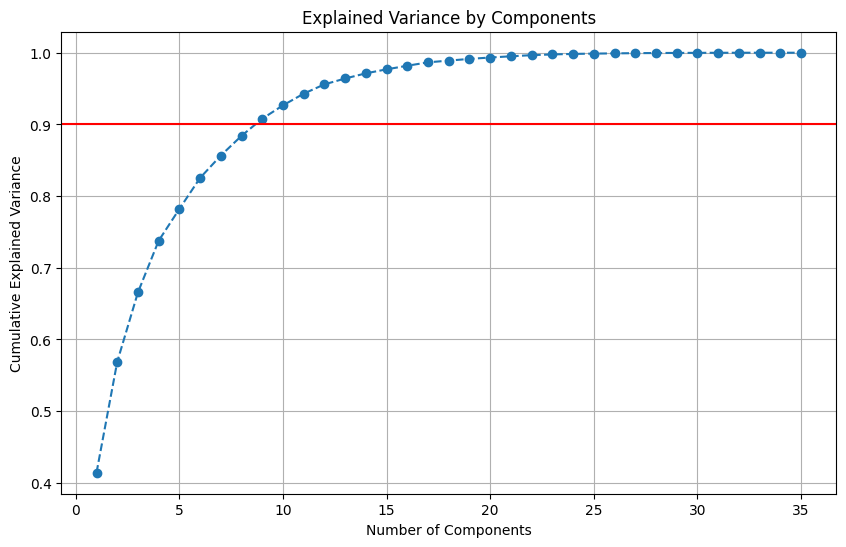

In [75]:
# Fit PCA
pca = PCA().fit(X_df_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [76]:
# Find the number of components that cover around 90% of the variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f'Number of components to cover around 90% of the variance: {n_components}')

Number of components to cover around 90% of the variance: 9


In [77]:
# Transform the data using the optimal number of components
X_reduced = PCA(n_components=n_components).fit_transform(X_df_scaled)

# Create a DataFrame with the reduced data
principalDf = pd.DataFrame(data=X_reduced)
print(principalDf.head(10))

          0         1         2         3         4         5         6  \
0  1.477951 -0.178111  0.674282  0.508789 -0.335831  0.071303 -0.192491   
1  1.470100 -0.122641  0.660219  0.543329 -0.438854  0.093599  0.032257   
2  0.836290  0.393407  0.924210  0.427173  0.743971 -0.024972 -0.089782   
3 -1.207176  0.063443  0.250484 -0.374407  0.081348  0.117239 -0.108211   
4  1.397951 -0.034366  0.648323  0.451075 -0.068669 -0.129733 -0.398023   
5  1.200612  0.378140  0.628349  0.450877  0.388001 -0.209083 -0.231989   
6  1.313779  0.153889  0.532246  0.288762  0.043635  0.061303 -0.545772   
7  1.242361  0.480516  0.476251  0.546413  0.180035 -0.312076  0.302132   
8 -1.071119  0.333787  0.299893 -0.350854 -0.258115  0.150517  0.074484   
9 -0.141621 -0.654494  0.016272 -0.487765 -0.111247 -0.197043 -0.142226   

          7         8  
0 -0.046179  0.011325  
1 -0.279808  0.175959  
2  0.315687  0.144859  
3 -0.418958 -0.002908  
4  0.009559  0.023414  
5  0.222885 -0.053395  
6 -0.1

In [78]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(principalDf, Y_df, test_size=0.2, random_state=42)

# Reshape target variables Y_train and Y_test
Y_train_reshaped = np.reshape(Y_train.values, (-1, Y_df.shape[1]))
Y_test_reshaped = np.reshape(Y_test.values, (-1, Y_df.shape[1]))

In [79]:
# Train the model using a MultiOutputRegressor with DecisionTreeRegressor as the base estimator
decision_tree_model = MultiOutputRegressor(DecisionTreeRegressor())

# Fit the model
decision_tree_model.fit(X_train, Y_train_reshaped)

# Make predictions on the test set
Y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test_reshaped, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 119052156381738.34


In [80]:
# Train the model using a MultiOutputRegressor with DecisionTreeRegressor as the base estimator
random_forest_model = MultiOutputRegressor(RandomForestRegressor())

# Fit the model
random_forest_model.fit(X_train, Y_train_reshaped)

# Make predictions on the test set
Y_pred = random_forest_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test_reshaped, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 98300608463235.75


In [81]:
# Define a function to rank the Y labels based on predicted values
def rank_y_labels(y_pred, y_columns):
    ranked_labels = []
    for pred in y_pred:
        ranked_indices = np.argsort(pred)
        ranked_labels.append([y_columns[i] for i in ranked_indices])
    return ranked_labels

# Example feature set (replace with your own feature set)
feature_set = np.random.rand(1, 9)  # Assuming num_features is defined

# Make predictions for the feature set
predicted_y_labels = random_forest_model.predict(feature_set)

# Rank the predicted Y labels
ranked_y_labels = rank_y_labels(predicted_y_labels, columns_to_exclude)

# Display the ranked Y labels
print("Ranked Y Labels:", ranked_y_labels)


Ranked Y Labels: [['random_forest', 'exponential_smoothing', 'xgboost', 'arima']]


In [83]:
# Create the directory if it does not exist
model_directory = os.path.join("../model_pickle")

# Construct the file path
pca_filename = os.path.join(model_directory, "pca_model.pkl")
ranking_model_filename = os.path.join(model_directory, "ranking_model.pkl")

# Delete the files if they already exist
if os.path.exists(pca_filename):
    os.remove(pca_filename)
if os.path.exists(ranking_model_filename):
    os.remove(ranking_model_filename)

with open(pca_filename, 'wb') as f:
    pickle.dump(pca, f)

with open(ranking_model_filename, 'wb') as f:
    pickle.dump(random_forest_model, f)